<a href="https://colab.research.google.com/github/klajosw/python/blob/master/kl_py_kepzaj_javito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="left"> 
    <img src="https://raw.githubusercontent.com/klajosw/python/master/kl_mie_python_logo_250.jpg" 
         align="left" width="251" height="251">
    
</p>


<p> </p>



# Python alapok képfeldolgozás 2

<https://klajosw.blogspot.com/>


---

In [0]:
import skimage
from matplotlib import pyplot as plt
import numpy as np
from random import randint
from sklearn.svm import SVR
import time
import scipy.misc

#beolvassuk a tanito kep-part: chaplin2.jpg az eredeti, a masik a 
#zajos, majd uint8-bol double-la alakitjuk

A = io.imread('chap2SAPb.jpg')
C = io.imread('chaplin2.jpg')
#print(A.dtype)   # uint8
#print(A.shape)   #(432,768)
#print(C.shape)   #(432,768)

A = np.array(A,dtype=np.float32)
C = np.array(C,dtype=np.float32)

A/=255
C/=255

#meghatarozzuk a kep meretet es inicializaljuk azt a matrixot ami a tanitovektorokat tartalmazza majd

(sn,sm)=C.shape    # sn=432, sm=768
D = np.zeros(((sn-2)*(sm-2),10))

#feltoltjuk a tanitovektorok matrixanak elso 9 oszlopat a zajos tanitokep segitsegevel

k=0
for i in range(3):              # i=1:3
    for j in range(3):          # j=1:3
        B=A[i:(sn-2+i),j:(sm-2+j)].reshape((sn-2)*(sm-2),)  
        D[:,k]=B
        k=k+1
        
#a tanitomatrix 10. oszlopa az eredeti tanitokep pixeleit tartalmazza 
B=C[2:(sn),2:(sm)].reshape((sn-2)*(sm-2),)      
D[:,9]=B

#kivalasztunk egy 50.000 elemu veletlen mintat a tanitasra, es elkezdjuk a tanitast

samp=[randint(0,(sn-2)*(sm-2)-1) for i in range(0,50000)]    # 50.000 elemu minta 0 és (sn-2)*(sm-2)-1 között (inclusive)
print('Kezdődik a tanítás')
start_time = time.time()
x=D[samp,0:9]
y=D[samp,9]
svm=SVR(gamma=3)
svm.fit(x,y)
print('Tanítás vége')
print('Ennyi ideig tartott: {0} mp'.format(time.time()-start_time))

###########################################################

#beolvassuk a javitani kivant kepet
P = io.imread('pandaSAP.jpg')
P = np.array(P,dtype=np.float32)
P/=255

(sn,sm)=P.shape    # (459x459)

#eloallitjuk a predict fv szamara a bemeneti matrixot
D =                      # sorok ugyanugy, 1-gyel kevesebb oszlop


start_time = time.time()
print('kezdodik a teszt')
Ppred=
print('teszt vege')
print('Ennyi ideig tartott: {0} mp'.format(time.time()-start_time))

print(Ppred.shape)

Ppred1=Ppred.reshape(sn-2,sm-2)

#a kapott vektorbol eloallitjuk a kepet és kiírjuk a panda2.jpg fájlba
scipy.misc.imsave('panda2.jpg', Ppred1)

# megnézzük az új képet:
skimage.io.imshow(Ppred1)
io.show()

In [0]:
import skimage
from matplotlib import pyplot as plt
import numpy as np
from random import randint
from sklearn.svm import SVR
import time
import scipy.misc

#beolvassuk a tanito kep-part: chaplin2.jpg az eredeti, a masik a 
#zajos, majd uint8-bol double-la alakitjuk

A = io.imread('chap2SAPb.jpg')
C = io.imread('chaplin2.jpg')
#print(A.dtype)   # uint8
#print(A.shape)   #(432,768)
#print(C.shape)   #(432,768)

A = np.array(A,dtype=np.float32)
C = np.array(C,dtype=np.float32)

A/=255
C/=255

#meghatarozzuk a kep meretet es inicializaljuk azt a matrixot ami a tanitovektorokat tartalmazza majd

(sn,sm)=C.shape    # sn=432, sm=768
D = np.zeros(((sn-2)*(sm-2),10))

#feltoltjuk a tanitovektorok matrixanak elso 9 oszlopat a zajos tanitokep segitsegevel

k=0
for i in range(3):              # i=1:3
    for j in range(3):          # j=1:3
        B=A[i:(sn-2+i),j:(sm-2+j)].reshape((sn-2)*(sm-2),)  
        D[:,k]=B
        k=k+1
        
#a tanitomatrix 10. oszlopa az eredeti tanitokep pixeleit tartalmazza 
B=C[2:(sn),2:(sm)].reshape((sn-2)*(sm-2),)      
D[:,9]=B

#kivalasztunk egy 50.000 elemu veletlen mintat a tanitasra, es elkezdjuk a tanitast

samp=[randint(0,(sn-2)*(sm-2)-1) for i in range(0,50000)]    # 50.000 elemu minta 0 és (sn-2)*(sm-2)-1 között (inclusive)
print('Kezdődik a tanítás')
start_time = time.time()
x=D[samp,0:9]
y=D[samp,9]
svm=SVR(gamma=3)
svm.fit(x,y)
print('Tanítás vége')
print('Ennyi ideig tartott: {0} mp'.format(time.time()-start_time))

#beolvassuk a javitani kivant kepet
P = io.imread('pandaSAP.jpg')
print(P.shape)   #(432,768)
P = np.array(P,dtype=np.float32)
print(P.shape)   #(432,768)
P/=255

(sn,sm)=P.shape    # (459x459)

#eloallitjuk a predict fv szamara a bemeneti matrixot
D = np.zeros(((sn-2)*(sm-2),9))   # sorok ugyanugy, 1-gyel kevesebb oszlop

k=0
for i in range(3):            
    for j in range(3):        
        B=P[i:(sn-2+i),j:(sm-2+j)].reshape((sn-2)*(sm-2),) 
        D[:,k]=B
        k=k+1

start_time = time.time()
print('kezdodik a teszt')
Ppred=svm.predict(D);
print('teszt vege')
print('Ennyi ideig tartott: {0} mp'.format(time.time()-start_time))

print(Ppred.shape)

Ppred1=Ppred.reshape(sn-2,sm-2)

#a kapott vektorbol eloallitjuk a kepet és kiírjuk a panda2.jpg fájlba
scipy.misc.imsave('panda2.jpg', Ppred1)

# megnézzük az új képet:
skimage.io.imshow(Ppred1)
io.show()

In [0]:
import skimage
from matplotlib import pyplot as plt
import numpy as np
from random import randint
from sklearn.svm import SVR
import time
import scipy.misc

#beolvassuk a tanito kep-part: chaplin2.jpg az eredeti, a masik a 
#zajos, majd uint8-bol double-la alakitjuk

A = io.imread('chap2SAPb.jpg')
C = io.imread('chaplin2.jpg')
#print(A.dtype)   # uint8
#print(A.shape)   #(432,768)
#print(C.shape)   #(432,768)

A = np.array(A,dtype=np.float32)
C = np.array(C,dtype=np.float32)

A/=255
C/=255

In [0]:
#meghatarozzuk a kep meretet es inicializaljuk azt a matrixot ami a tanitovektorokat tartalmazza majd

(sn,sm)=C.shape    # sn=432, sm=768
D = np.zeros(((sn-2)*(sm-2),10))

#feltoltjuk a tanitovektorok matrixanak elso 9 oszlopat a zajos tanitokep segitsegevel

k=0
for i in range(3):              # i=1:3
    for j in range(3):          # j=1:3
        B=A[i:(sn-2+i),j:(sm-2+j)].reshape((sn-2)*(sm-2),)  
        D[:,k]=B
        k=k+1
        
#a tanitomatrix 10. oszlopa az eredeti tanitokep pixeleit tartalmazza 
B=C[2:(sn),2:(sm)].reshape((sn-2)*(sm-2),)      
D[:,9]=B

#kivalasztunk egy 50.000 elemu veletlen mintat a tanitasra, es elkezdjuk a tanitast

samp=[randint(0,(sn-2)*(sm-2)-1) for i in range(0,50000)]    # 50.000 elemu minta 0 és (sn-2)*(sm-2)-1 között (inclusive)
print('Kezdődik a tanítás')
start_time = time.time()
x=D[samp,0:9]
y=D[samp,9]
svm=SVR(gamma=3)
svm.fit(x,y)
print('Tanítás vége')
print('Ennyi ideig tartott: {0} mp'.format(time.time()-start_time))

kezdodik a tanitas
tanitas vege
Ennyi ideig tartott: 5.6902172565460205 mp


In [0]:
#beolvassuk a javitani kivant kepet
P = io.imread('pandaSAP.jpg')
print(P.shape)   #(432,768)
P = np.array(P,dtype=np.float32)
print(P.shape)   #(432,768)
P/=255

(sn,sm)=P.shape    # (459x459)

#eloallitjuk a predict fv szamara a bemeneti matrixot
D = np.zeros(((sn-2)*(sm-2),9))   # sorok ugyanugy, 1-gyel kevesebb oszlop

k=0
for i in range(3):            
    for j in range(3):        
        B=P[i:(sn-2+i),j:(sm-2+j)].reshape((sn-2)*(sm-2),) 
        D[:,k]=B
        k=k+1

start_time = time.time()
print('kezdodik a teszt')
Ppred=svm.predict(D);
print('teszt vege')
print('Ennyi ideig tartott: {0} mp'.format(time.time()-start_time))

print(Ppred.shape)

(459, 459)
(459, 459)
kezdodik a teszt
teszt vege
Ennyi ideig tartott: 8.819958925247192 mp
(208849,)


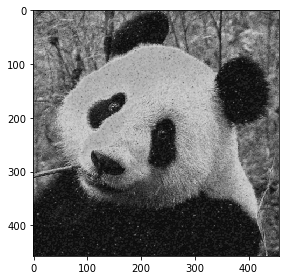

In [0]:
Ppred1=Ppred.reshape(sn-2,sm-2)

#import scipy.misc
#scipy.misc.toimage(Ppred1*255).save('panda3.jpg')
     # The current scipy version started to normalize all images so that min(data) become black 
     # and max(data) become white. This is unwanted if the data should be exact grey levels or exact RGB channels.

#a kapott vektorbol eloallitjuk a kepet és kiírjuk a panda2.jpg fájlba
scipy.misc.imsave('panda2.jpg', Ppred1)
scipy.misc.imsave('panda3.jpg', Ppred1*255)    # mindegy melyik

# megnézzük az új képet:
skimage.io.imshow(Ppred1)
io.show()
#plt.show()    # mindegy melyik

#skimage.io.imshow(Ppred1)

#megnezzuk, hogy a javitott kep es az eredeti mennyire kulonbozik
#P=imread('panda.jpg');
#imshow(255-abs(P(2:458,2:458)-panda))